# Popularity of NBA team vs their Profitability

## Business Understanding

### Why this analysis
Understanding the objective & the context of an analysis is critical to help fullfil these goals. 
* Is is an NBA team that need to decide whether they should invest more resources into Social Media?
* Is this for an Asset Management firm looking to identify indicators for making inestment decisions in Sport Clubs?

This is an unknown.

### What to analyze
Define whether there is a correlation between between the popularity of NBA teams and their profitability

### How to conduct this analysis

* Measure the popularity of NBA teams
* Measure the profitability of NBA teams
* Establish the correlation between both



## Data Acquisition

### Data Sources

2 Data Sources are required for the analysis:
#### 1. The popularity of NBA teams
Social Medias and in particular Twitter it a good indicator of popularity.
We have measured the popularity of a team by using 2 features:
* The number tweets published by each team since they created their Twitter account (ie: Their engagement on Twitter)
* The numbers of followers for each team

These information are publicly available.

There could be more refined methods for measuring popularity on Twitter. For instance we could look at how much they are referrenced/mentioned by other users, the sentiments of these tweets and establish these measures by year. These information is accessible through [Twitter's Search API](https://developer.twitter.com/en/docs/tweets/search/overview/enterprise) under an Enterprise license. That data could be used at a later stage. Also other Social Media such as Instagram or Twitter could be included in the popularity analyisis.  
The Free API of Twitter enables to extract only 7 days of history which wasn't relevant for our Case Study.  

#### 2. The profitability of NBA teams

To measure the profitability of NBA teams we have used their *Operating Income*.

The Operating Income is a superior measure than the sales of a team’s t-shirt. For 2 reasons:
* It includes all revenues, not just those of a single product 
* It includes the expenses which his a key element of the profitability (Gross Income = Gross Income − Operating Expenses).

We have retrieved the Operating Income from [Forbes' NBA 2019 valuation](https://www.forbes.com/nba-valuations/list). Forbes regularly updates this publication and their history can be obtained through the [Internet Archive](https://web.archive.org/web/*/https://www.forbes.com/nba-valuations/list/)


### Data Acquisition Pipelines

Since this was a one-off analyis and these are small data set, we have collected and stored the data into CVS files. 

Twitter Data have been collected manually since for the first time we needed to identify the twitter url for each time. The data file is stored in ../resources/data/NBATwitter.csv
Going futher, a Pyhton library (ex: http://www.tweepy.org/)vcould be used to automate the lookup twitter account details 

The profitability data was copied from the web into a CSV file: ../resources/data/ForbesNBA2019Valuation.csv
If this task needed to be repeated, we could automate the task by using a web scrapping python library (ex: https://scrapy.org/).  


### Data Environment

Given the small size of data used and the simplicity of the analysis (correlation), the processing doesn't need to run on a clustered infrastructure. The files have been stored in Git.

This will allow anyone to run the analysis on their host after having checked out the source code with no external dependencies.



 ## Data understanding
 
 ### Cleaning and wrangling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:

profitability_file = '../resources/data/ForbesNBA2019Valuation.csv'
profitability_df = pd.read_csv(profitability_file)
profitability_df['profit_in_M'] = profitability_df['Operating Income'].str[1:-2].astype(int)
profitability_df.head()

Rank                   Team Current Value 1-Yr Value Change Debt/Value  \
0   #1        New York Knicks          $4 B               11%         1%   
1   #2     Los Angeles Lakers        $3.7 B               12%         1%   
2   #3  Golden State Warriors        $3.5 B               13%        23%   
3   #4          Chicago Bulls        $2.9 B               12%         3%   
4   #5         Boston Celtics        $2.8 B               12%         6%   

  Revenue Operating Income  profit_in_M  
0  $443 M           $155 M          155  
1  $395 M           $147 M          147  
2  $401 M           $103 M          103  
3  $287 M           $114 M          114  
4  $287 M           $100 M          100

In [6]:

twitter_file = '../resources/data/NBATwitter.csv'
twitter_df = pd.read_csv(twitter_file)
twitter_df['nb_tweets_in_K'] = twitter_df['NbTweets'].str[:-1].astype(float)
twitter_df['nb_followers_in_M'] = twitter_df['Followers'].str[:-1].astype(float)
twitter_df.head()

Team                               URL NbTweets Followers  \
0        New York Knicks      https://twitter.com/nyknicks    49.3K     2.16M   
1     Los Angeles Lakers        https://twitter.com/Lakers    62.9K     8.18M   
2  Golden State Warriors      https://twitter.com/warriors    84.7K     6.38M   
3          Chicago Bulls  https://twitter.com/chicagobulls    51.2K     4.11M   
4         Boston Celtics       https://twitter.com/celtics    36.3K     3.49M   

   nb_tweets_in_K  nb_followers_in_M  
0            49.3               2.16  
1            62.9               8.18  
2            84.7               6.38  
3            51.2               4.11  
4            36.3               3.49

In [7]:
#aggregate
agg_df = pd.merge(twitter_df, profitability_df, on='Team')
agg_df = agg_df[["Team", "profit_in_M", "nb_tweets_in_K", "nb_followers_in_M"]]
agg_df.head(30)


Team  profit_in_M  nb_tweets_in_K  nb_followers_in_M
0          New York Knicks          155            49.3               2.16
1       Los Angeles Lakers          147            62.9               8.18
2    Golden State Warriors          103            84.7               6.38
3            Chicago Bulls          114            51.2               4.11
4           Boston Celtics          100            36.3               3.49
5            Brooklyn Nets           53            82.3               1.06
6          Houston Rockets          103             2.0               2.98
7         Dallas Mavericks           99            40.8               1.64
8     Los Angeles Clippers           40            54.4               1.54
9               Miami Heat           40            58.4               4.68
10         Toronto Raptors           76            63.9               2.12
11      Philadelphia 76ers           68            57.3               1.82
12       San Antonio Spurs           63            43.0               3.47
13  Portland Trail Blazers           40            82.6               1.26
14        Sacramento Kings           72            68.8               1.07
15      Washington Wizards           34            61.0               1.02
16            Phoenix Suns           47            74.4               1.09
17   Oklahoma City Thunder           10            31.1               2.76
18               Utah Jazz           59            63.8               0.95
19          Indiana Pacers           50            55.7               1.23
20          Denver Nuggets           47            61.3               0.93
21         Milwaukee Bucks           25           122.0               1.14
22           Orlando Magic           64            42.3               1.49
23           Atlanta Hawks           42            74.8               1.25
24     Cleveland Cavaliers          -13            50.3               3.25
25         Detroit Pistons           52            71.7               0.93
26  Minnesota Timberwolves           47            54.1               0.97
27       Charlotte Hornets           22            51.9               0.96
28    New Orleans Pelicans           29            65.4               1.01
29       Memphis Grizzlies           27            58.5               1.05

### Exploration: basic statistics

In [8]:
agg_df.describe()

profit_in_M  nb_tweets_in_K  nb_followers_in_M
count    30.000000       30.000000          30.000000
mean     60.500000       59.206667           2.199667
std      38.182637       20.623153           1.755459
min     -13.000000        2.000000           0.930000
25%      40.000000       50.525000           1.052500
50%      51.000000       58.450000           1.375000
75%      75.000000       67.950000           2.925000
max     155.000000      122.000000           8.180000

In [9]:
#Normalizing the data
import numpy as np
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
cols = ['profit_in_M','nb_tweets_in_K','nb_followers_in_M']
profit_norm = min_max_scaler.fit_transform(agg_df[cols])
df_normalized = pd.DataFrame(profit_norm, columns=cols)
df_normalized.describe()

profit_in_M  nb_tweets_in_K  nb_followers_in_M
count    30.000000       30.000000          30.000000
mean      0.437500        0.476722           0.175126
std       0.227278        0.171860           0.242132
min       0.000000        0.000000           0.000000
25%       0.315476        0.404375           0.016897
50%       0.380952        0.470417           0.061379
75%       0.523810        0.549583           0.275172
max       1.000000        1.000000           1.000000

## Modeling

### Correlation Visualization

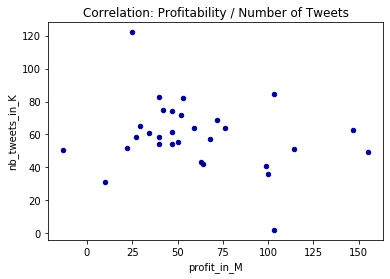

In [10]:
ax = agg_df.plot.scatter(x='profit_in_M', y='nb_tweets_in_K', color='DarkBlue', title='Correlation: Profitability / Number of Tweets')

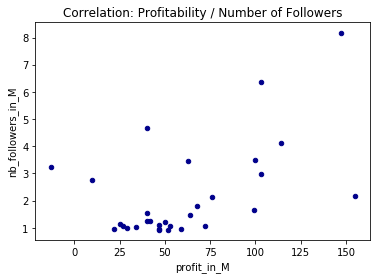

In [11]:
ax = agg_df.plot.scatter(x='profit_in_M', y='nb_followers_in_M', color='DarkBlue', title='Correlation: Profitability / Number of Followers')

### Correlation 

In [18]:
agg_df.corr(method='spearman')

profit_in_M  nb_tweets_in_K  nb_followers_in_M
profit_in_M           1.000000       -0.159225           0.437862
nb_tweets_in_K       -0.159225        1.000000          -0.355768
nb_followers_in_M     0.437862       -0.355768           1.000000

### Evaluation

The correleation between popularity of NBA teams on Twitter and their profitability **is moderate** (0.44). 
It is to be noted that the popularity is not measured by the number of tweets published, but by the number of followers.